# Indian Sign Language Classification

<a href="https://www.kaggle.com/code/notshrirang/isl-classification" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
%matplotlib inline

In [2]:
tf.random.set_seed(42)

## Using `image_dataset_from_directory`

In [4]:
train_datagen = tf.keras.utils.image_dataset_from_directory(train_dir, shuffle=True, subset="training", label_mode="categorical", batch_size=32, image_size=(224, 224), validation_split=0.3, seed=42)
valid_datagen = tf.keras.utils.image_dataset_from_directory(train_dir, shuffle=True, subset="validation", label_mode="categorical", batch_size=32, image_size=(224, 224), validation_split=0.3, seed=42)

Found 42000 files belonging to 35 classes.
Using 29400 files for training.
Found 42000 files belonging to 35 classes.
Using 12600 files for validation.


In [16]:
train_datagen

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 35), dtype=tf.float32, name=None))>

In [5]:
train_datagen.class_names

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

### Defining Data Augmentation Layers

In [6]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.GaussianNoise(0.2)
], name="data_augmentation")

### Downloading ResNet50 wrights

In [7]:
resnet_model = tf.keras.applications.ResNet50(weights='imagenet', 
                                              include_top=False, 
                                              input_shape=(224, 224, 3), 
                                              classes=35,
                                             )
for layer in resnet_model.layers[:143]:
    layer.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


### Defining Model

In [8]:
inputs = tf.keras.layers.Input(shape = (224, 224, 3), name="input_layer")

x = data_augmentation(inputs)

x = resnet_model(x, training = False)

x = tf.keras.layers.Dropout(0.3)(x)

x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(35, activation="softmax", name="output_layer")(x)

tl_model_2 = tf.keras.Model(inputs, outputs)

### Training Model

In [9]:
tl_model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=["accuracy"])

tl_model_2.fit(train_datagen, epochs=40, steps_per_epoch=len(train_datagen), validation_data=valid_datagen, validation_steps=int(0.25 * len(valid_datagen)), callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./logs/'), tf.keras.callbacks.EarlyStopping(min_delta=0.01, patience=3)])

Epoch 1/40
919/919 [==============================] - 368s 385ms/step - loss: 2.4858 - accuracy: 0.2671 - val_loss: 6.2623 - val_accuracy: 0.0912
Epoch 2/40
919/919 [==============================] - 231s 251ms/step - loss: 0.7786 - accuracy: 0.7838 - val_loss: 1.1816 - val_accuracy: 0.6193
Epoch 3/40
919/919 [==============================] - 204s 222ms/step - loss: 0.1814 - accuracy: 0.9548 - val_loss: 0.0659 - val_accuracy: 0.9809
Epoch 4/40
919/919 [==============================] - 198s 215ms/step - loss: 0.1005 - accuracy: 0.9750 - val_loss: 0.0411 - val_accuracy: 0.9888
Epoch 5/40
919/919 [==============================] - 193s 210ms/step - loss: 0.0702 - accuracy: 0.9822 - val_loss: 0.5241 - val_accuracy: 0.8571
Epoch 6/40
919/919 [==============================] - 189s 206ms/step - loss: 0.0582 - accuracy: 0.9846 - val_loss: 0.0314 - val_accuracy: 0.9879
Epoch 7/40
919/919 [==============================] - 185s 201ms/step - loss: 0.0397 - accuracy: 0.9894 - val_loss: 0.0219 -

In [10]:
tl_model_2.save("tl_model_2.h5")

In [11]:
history = tl_model_2.history

### Plotting Training Curves

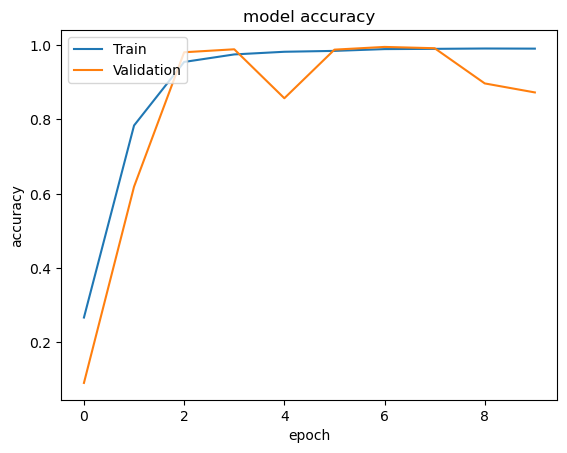

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("resenet50_with_augmentation2.png")
plt.show()

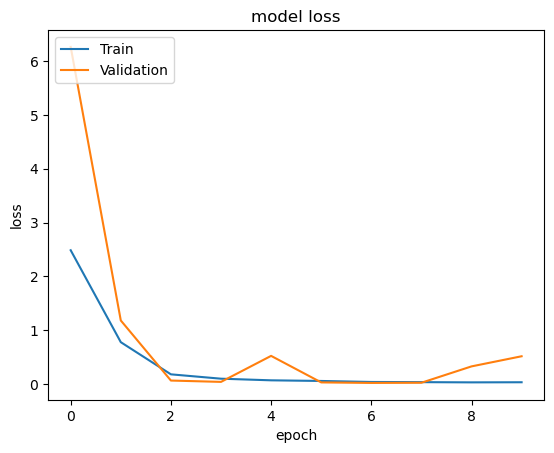

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("resenet50_with_augmentation_loss2.png")
plt.show()

## Evaluating Model

In [15]:
tl_model_2.evaluate(valid_datagen)

394/394 [==============================] - 39s 99ms/step - loss: 0.5027 - accuracy: 0.8751


[0.5027071833610535, 0.8750793933868408]